In [1]:
# libs for data processing
import pandas as pd
import numpy as np

# libs for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

# Other libs
import calendar
from datetime import datetime

# Don't print warnings
import warnings
warnings.filterwarnings('ignore')

### In this project, we will analyse and visualise behavioural data (time spent on personal activities)

#### Data fields and explanation
<ul>
  <li><code>date</code>
  <li><code>wk_of_yr</code> -- what week of the year
  <li><code>activity</code> -- The category of activities
  <li><code>things done</code> -- What was done for that session
  <li><code>hours</code> -- number of hours logged
</ul>

In [2]:
# read the dataframe
df_2022 = pd.read_excel('Time tracker (personal).xlsx', sheet_name='personal (2022)')
df_2023 = pd.read_excel('Time tracker (personal).xlsx', sheet_name='personal (2023)')

# drop block and week for both
df_2022.drop(columns=['block', 'week'], inplace=True)
df_2023.drop(columns=['wk of yr'], inplace=True)
# Combine both dataframes ~~
df = pd.concat([df_2022, df_2023]).reset_index(drop=True)

#select rows where activity is book, prog or art or job
df = df[(df['activity']=='prog') | (df['activity']=='art')]

# convert hours to type float
df['hours'] = pd.to_numeric(df['hours'])

#### <span style='color:LightGreen'>**Pt1: Find out the following:**</span>
<ul style='color:LightGreen'>
  <li>What is the total number of hours spent on personal activities?
  <li>What is the total number of activity sessions logged?
  <li>What is the average session duration?
</ul>

In [3]:
total_hrs = df['hours'].sum().round(1)
total_sess = len(df)
avg_sess_duration = round((total_hrs/total_sess), 1)
avg_sess_duration_mins = round(avg_sess_duration * 60)

print(f'Total number of hours:    {total_hrs} hours')
print(f'Total number of sessions: {total_sess} sessions')
print(f'Avg session duration:     {avg_sess_duration} hrs/session ~{avg_sess_duration_mins} mins/session')

Total number of hours:    718.2 hours
Total number of sessions: 326 sessions
Avg session duration:     2.2 hrs/session ~132 mins/session


#### <span style='color:LightGreen'>**Sort art projects**</span>

In [4]:
df_art = df[df['activity']=='art']

In [5]:
# get list of unique activities for category
art_activities = df_art[df_art['activity']=='art']['things done'].value_counts().index.to_list()
# art_activities

In [6]:
# create a map from above list
art_map = {'art (camping pkmn)'         : 'Pokemon (Hike)',
          'art (christmas card)'        : 'Christmas card',
          'The Good Place art'          : 'The Good Place',
          "art (caro's gift)"           : 'Red Baron Snoopy',
          'Team rocket'                 : 'Pokemon (Team Rocket)',
          'Red Baron Snoopy'            : 'Red Baron Snoopy',
          'art - pokemon'               : 'Pokemon (Team Rocket)',
          'the office create template'  : 'The Office',
          'art - creed'                 : 'The Office',
          'the office chars'            : 'The Office',
          'michael scott'               : 'The Office',
          'The Office art'              : 'The Office'
          }

# combine all into a set (if not in this one, put label as 'misc')
all_defined_activities = set([val for val in art_map.values()])

In [7]:
# replace values with mapped values
df_art['things done'] = df_art['things done'].map(art_map)

# fill NaN values with 'misc pixel art'
df_art.replace(to_replace = pd.NA, value = 'misc pixel art', inplace=True)

# add a proj column
df_art.insert(2, 'proj', df_art['things done'], False)

#### <span style='color:LightGreen'>**Sort programming projects**</span>

In [8]:
df_prog = df[df['activity']=='prog']

In [9]:
# get list of unique activities for category
prog_activities = df_prog[df_prog['activity']=='prog']['things done']

In [10]:
key_prog_activities = []

# change values and append to key programming activities
for activity in prog_activities:
  if activity.__contains__("CS50P"):
    prog_activities.replace(activity, "CS50P course", inplace=True)
    key_prog_activities.append("CS50P course")
  if activity.__contains__("FCC: Python"):
    prog_activities.replace(activity, "FCC Python course", inplace=True)
    key_prog_activities.append("FCC Python course")
  if activity.__contains__("FCC: data analysis"):
    prog_activities.replace(activity, "FCC data analysis course", inplace=True)
    key_prog_activities.append("FCC data analysis course")
  if activity.__contains__("Coursera"):
    prog_activities.replace(activity, "Coursera data analyst/science course", inplace=True)
    key_prog_activities.append("Coursera data analyst/science course")
      
  if activity.__contains__("UFC"):
    prog_activities.replace(activity, "UFC scraping & prediction proj", inplace=True)
    key_prog_activities.append("UFC scraping & prediction proj")
  if activity.__contains__("health and fitness analysis"):
    prog_activities.replace(activity, "health and fitness analysis", inplace=True)
    key_prog_activities.append("health and fitness analysis")
  if activity.__contains__("journal analysis"):
    prog_activities.replace(activity, "journal analysis", inplace=True)
    key_prog_activities.append("journal analysis")
  if activity.__contains__("time tracker analysis"):
    prog_activities.replace(activity, "activity tracker analysis", inplace=True)
    key_prog_activities.append("activity tracker analysis")
  if activity.__contains__("medium"):
    prog_activities.replace(activity, "medium blog write up", inplace=True)
    key_prog_activities.append("medium blog write up")

# this is just to check whether stuff has been replaced and if you want to group other projs
#set(prog_activities)

In [11]:
# replace names of activities not in key activities
prog_activities[prog_activities.isin(key_prog_activities)==False]='misc prog activity'

# assign to prog dataframe
df_prog['things done'] = prog_activities

# add a proj column
df_prog.insert(2, 'proj', df_prog['things done'], False)

# print check
# df_prog.head(2)

#### <span style='color:LightGreen'>**Combine all different categories again. IF WISH TO RESTART, RESTART HERE**</span>

In [12]:
# make a new df and combine all dataframes
df = pd.DataFrame()
df = pd.concat([df_art, df_prog]).reset_index(drop=True)

# sort according to date
df.sort_values('date', ascending=True, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

# print check
df.head()

,date,activity,proj,things done,hours
0,2022-06-30,prog,misc prog activity,misc prog activity,0.25
1,2022-06-30,prog,misc prog activity,misc prog activity,0.50
2,2022-07-01,prog,misc prog activity,misc prog activity,3.00
3,2022-07-02,prog,misc prog activity,misc prog activity,0.50
4,2022-07-03,prog,misc prog activity,misc prog activity,4.75


#### <span style='color:LightGreen'>**Visualise time spent grouped by activity category:**</span>

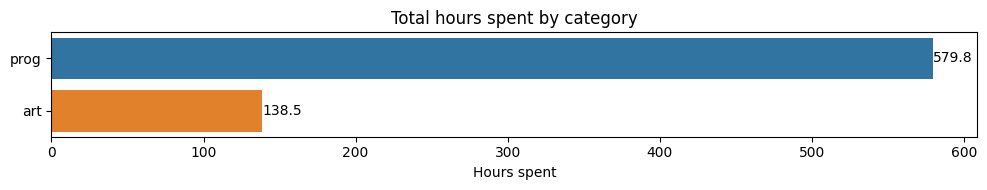

In [13]:
# creating figure
fig, ax = plt.subplots(figsize=(10, 2))

# create groupby object
hrs_grp_by_category = df.groupby(by='activity')['hours'].sum().round(1).sort_values(ascending=False)

# plot total hours spent for each category
ax = sns.barplot(x=hrs_grp_by_category, y=hrs_grp_by_category.index)
ax.set(title='Total hours spent by category', xlabel='Hours spent', ylabel='')
ax.bar_label(ax.containers[0])

fig.tight_layout()
fig.show()

#### <span style='color:LightGreen'>**Visualise time spent for PROGRAMMING grouped by activity:**</span>

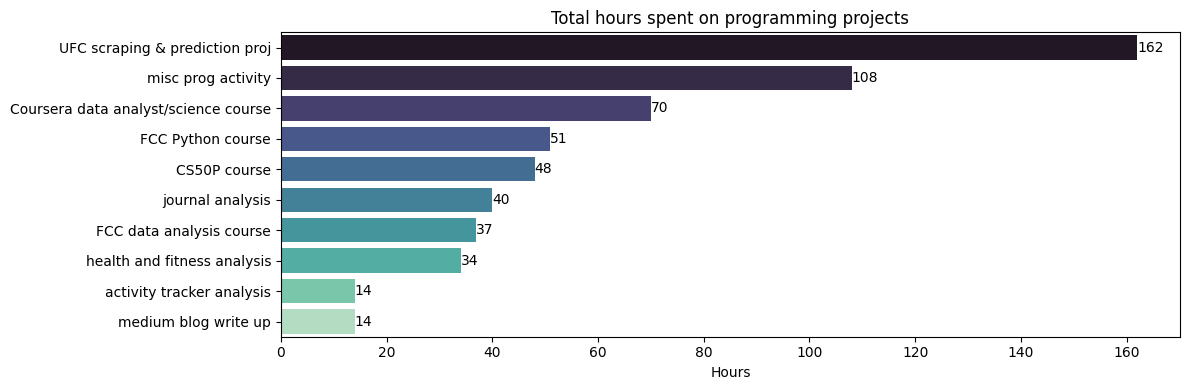

In [14]:
# creating figure
fig, ax = plt.subplots(figsize=(12, 4))

# create groupby object
prog_projs_hrs = df[df['activity']=='prog'].groupby(by='things done')['hours'].sum().round().sort_values(ascending=False)

# plot total hours spent for each category
ax = sns.barplot(x=prog_projs_hrs, y=prog_projs_hrs.index, palette='mako')
ax.set(title='Total hours spent on programming projects', xlabel='Hours', ylabel='')
ax.bar_label(ax.containers[0])

fig.tight_layout()
fig.show()

Comparing time spent on 1) courses 2) projects 3) misc stuff

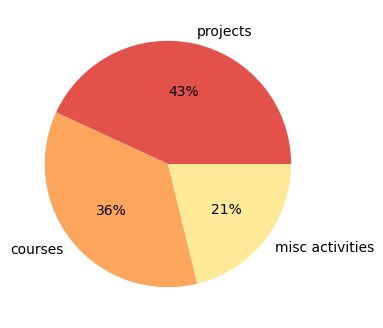

In [15]:
prog_cat_groups = df[df['activity']=='prog'].groupby(by='things done')['hours'].sum()

proj_names = ['UFC scraping & prediction proj', 'health and fitness analysis', 'journal analysis', 'medium blog write up', 'time tracker analysis']
course_names = ['CS50P course', 'Coursera data analyst/science course', 'FCC Python course', 'FCC data analysis course']

prog_cat_list_and_vals = {'projects': 0, 'courses': 0, 'misc activities': 0}
#prog_cat_vals = [0, 0, 0]

# loop though cat groups
for key, val in prog_cat_groups.items():
  if key in proj_names:
    prog_cat_list_and_vals['projects'] += val
  elif key in course_names:
    prog_cat_list_and_vals['courses'] += val
  else:
    prog_cat_list_and_vals['misc activities'] += val

# plot pie chart
fig, ax = plt.subplots(figsize=(4, 4))
palette_color = sns.color_palette('Spectral')
ax = plt.pie(prog_cat_list_and_vals.values(), labels=prog_cat_list_and_vals.keys(),
             colors=palette_color,
             autopct='%.0f%%')
fig.show()


#### <span style='color:LightGreen'>**Visualise time spent for ART grouped by activity:**</span>

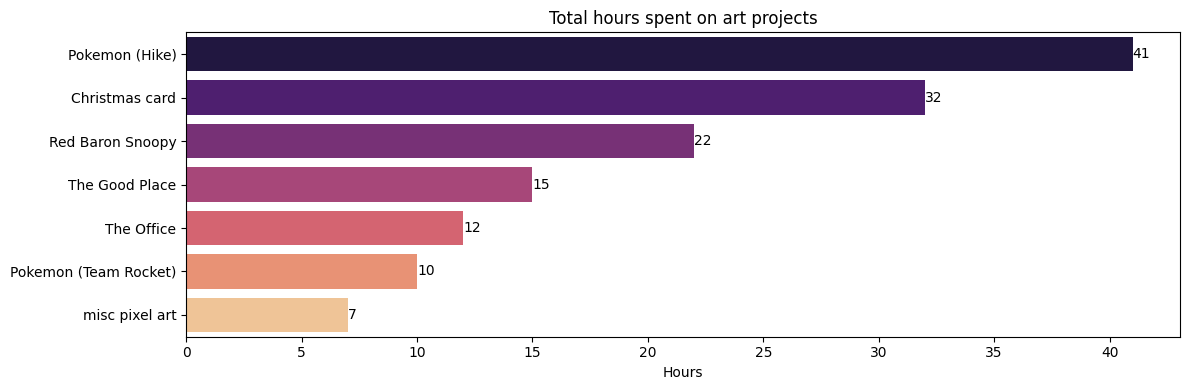

In [16]:
# creating figure
fig, ax = plt.subplots(figsize=(12, 4))

# create groupby object
art_projs_hrs = df[df['activity']=='art'].groupby(by='things done')['hours'].sum().round().sort_values(ascending=False)

# plot total hours spent for each category
ax = sns.barplot(x=art_projs_hrs, y=art_projs_hrs.index, palette='magma')
ax.set(title='Total hours spent on art projects', xlabel='Hours', ylabel='')
ax.bar_label(ax.containers[0])

fig.tight_layout()
fig.show()

#### <span style='color:LightGreen'>**Visualise time spent grouped by activity category:**</span>
<span style='color:LightGreen'> Grouping by courses and practicals, </span>
<ul style='color:LightGreen'>
  <li>Hours many hours have been spent on programming projects?
  <li>Hours many hours have been spent on all art projects
  <li>what is the total number 
</ul>

#### <span style='color:LightGreen'>**Pt1: Visualise hours spent per day on a time series**</span>

In [17]:
# copy dataframe
pt1_df = df.copy()

# We first get the first and last recorded days
firstday =  pt1_df['date'].min()
lastday = pt1_df['date'].max()

# get range of dates using 'date_range' function
date_range = pd.date_range(start=firstday, end=lastday, freq='D')

# create a dataframe using date range as index (init all values to null)
daily_hrs = pd.DataFrame(data={'hours': [pd.NA for i in date_range]}, index=date_range)

# From data df, group by date and sum hours, then convert to dataframe
pt1_hrs_by_date = pt1_df.groupby(by='date')['hours'].sum()
pt1_hrs_by_date = pt1_hrs_by_date.to_frame()

# merge on index. drop useless column. fill na values with 0
daily_hrs = daily_hrs.join(pt1_hrs_by_date, lsuffix='hours').drop(columns='hourshours').fillna(0)

Plot daily sum

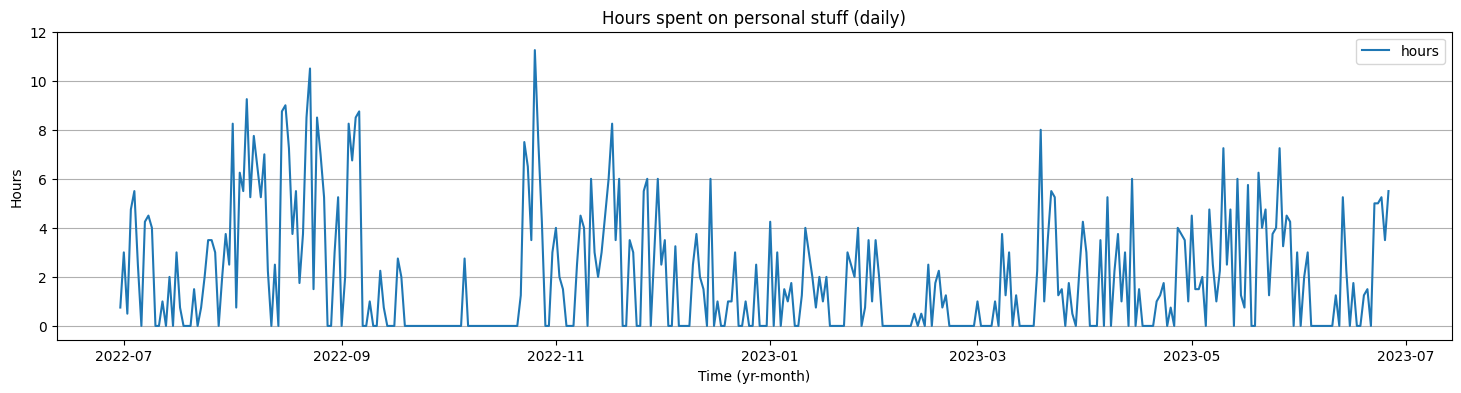

In [18]:
# plot daily
fig, ax = plt.subplots(figsize=(18, 4))
ax = sns.lineplot(data=daily_hrs)
ax.set(title='Hours spent on personal stuff (daily)', xlabel='Time (yr-month)', ylabel='Hours')
plt.yticks(ticks=[i for i in range(0, 13, 2)])
ax.grid(visible=True, which='both', axis='y')

plot daily mean (weekly resample)

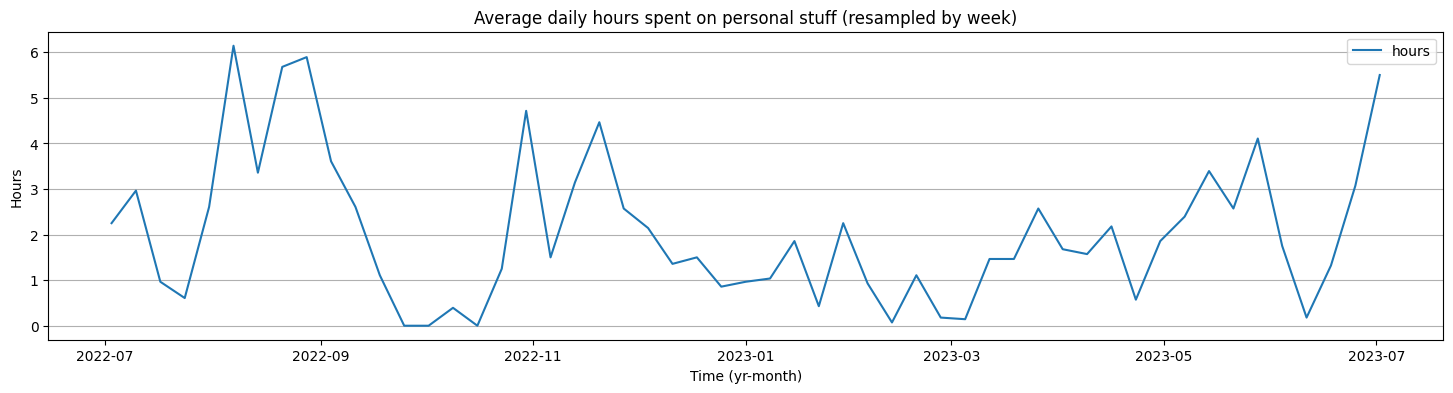

In [19]:
# resample to weekly frequency, aggregating with MEAN (thus, plotting daily mean)
pt1_daily_mean = daily_hrs[['hours']].resample('W').mean()

# plot weekly sum
fig, axes = plt.subplots(figsize=(18, 4))
ax = sns.lineplot(data=pt1_daily_mean)
ax.set(title='Average daily hours spent on personal stuff (resampled by week)', xlabel='Time (yr-month)', ylabel='Hours')
ax.grid(visible=True, which='both', axis='y')

Plot weekly sum

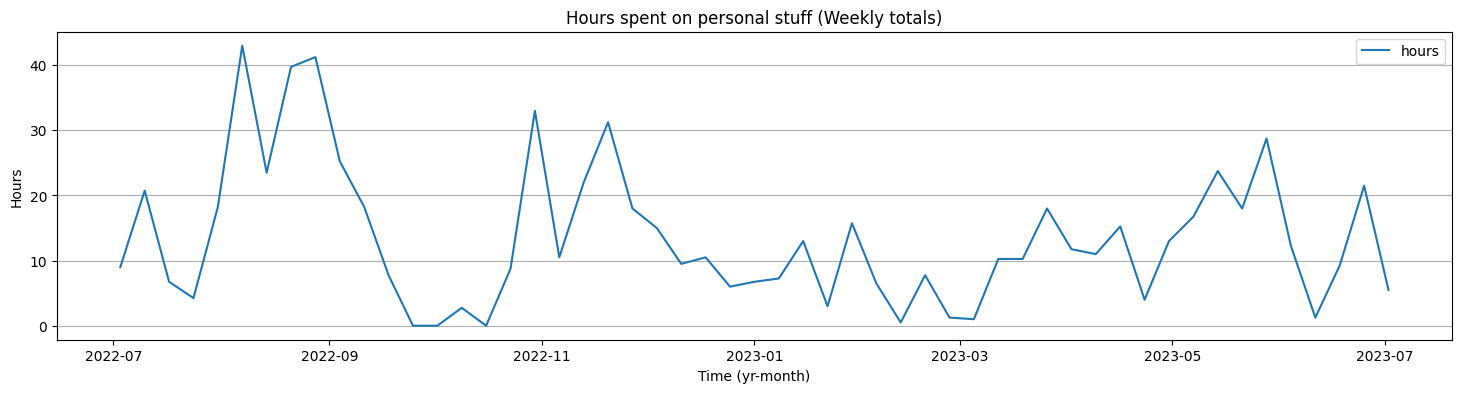

In [20]:
# resample the data to weekly frequency, aggregating with SUM
pt1_weekly_sum = daily_hrs[['hours']].resample('W').sum()

# plot weekly sum and weekly mean
fig, ax = plt.subplots(figsize=(18, 4))
ax = sns.lineplot(data=pt1_weekly_sum)
ax.set(title='Hours spent on personal stuff (Weekly totals)', xlabel='Time (yr-month)', ylabel='Hours')
#plt.yticks(ticks=[i for i in range(0, 11, 1)])
ax.grid(visible=True, which='both', axis='y')

#### <span style='color:LightGreen'>**Pt2: Which day of the week do I spend the most time on personal activities?**</span>

In [21]:
# select without RTP stuff
pt2_df= df.copy()

# From data df, group by date and sum hours, then convert to dataframe
pt2_df = pt2_df.groupby(by='date')['hours'].sum()
pt2_df = pt2_df.to_frame()

# create a new column for day of the week and set values using index
pt2_df['day of week'] = pt2_df.index.to_series().dt.dayofweek

# group by day of week. Get sum of hours
hrs_by_day = pt2_df.groupby(by='day of week')['hours'].mean().round(1)

# create a list for day of the week (above function is mapped in this order)
day_of_wk = ['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

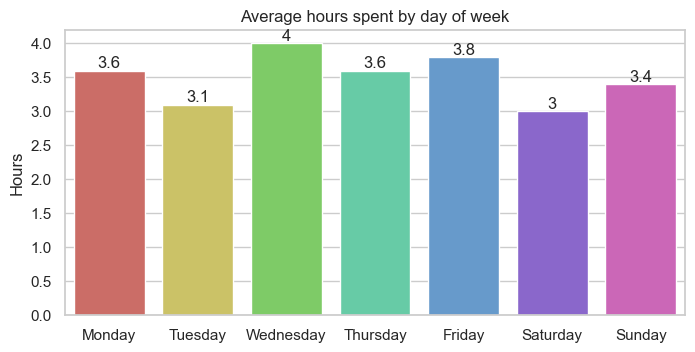

In [47]:
# plot average hours spent on school by day of the week
fig, ax = plt.subplots(figsize=(8, 3.7))
sns.barplot(y=hrs_by_day, x=day_of_wk, palette='hls')
ax.set(title='Average hours spent by day of week', ylabel='Hours')
ax.bar_label(ax.containers[0])

#fig.tight_layout()
fig.show()

## <span style='color:LightGreen'>**Combine personal df with school df**</span>

In [23]:
# copy data for personal activities
df_pers = df.copy()

# add another column to indicate personal
df_pers.insert(1, 'pers_sch', pd.Series(['personal' for i in range(len(df_pers))]), False)

# rename activity to 'type'
df_pers.rename(columns={"activity": "type"}, inplace=True)

# delete 'things done' col
df_pers.drop(columns=['things done'], inplace=True)

df_pers.tail(2)

,date,pers_sch,type,proj,hours
324,2023-06-26,personal,prog,activity tracker analysis,3.0
325,2023-06-26,personal,prog,activity tracker analysis,0.5


In [24]:
df_sch = pd.read_excel('Time tracker (school).xlsx', sheet_name='school_tracker')

# Select rows that are not 'tutoring Kritika'
df_sch = df_sch[df_sch['Course name'] !='Tutoring Kritika']

# drop columns
df_sch.drop(columns=['Year', 'Block', 'Week', 'Activity', 'Stress (1 -10)\n 10 = very stress', 'Productivity (1 -10)\n10 = very focused'], inplace=True)

# rename columns
df_sch.rename(columns={"Date": "date"}, inplace=True)
type_rename = df_sch.pop('Course type'); df_sch.insert(1, 'type', type_rename, False)
proj_rename = df_sch.pop('Course name'); df_sch.insert(2, 'proj', proj_rename, False)
df_sch.rename(columns={"Hours": "hours"}, inplace=True)

# reset index
df_sch.reset_index(drop=True, inplace=True)

# add another column to indicate school
df_sch.insert(1, 'pers_sch', pd.Series(['school' for i in range(len(df_sch))]), False)

df_sch.tail(2)

,date,pers_sch,type,proj,hours
848,2023-06-22,school,thesis,Bachelor Thesis,0.5
849,2023-06-22,school,thesis,Bachelor Thesis,0.5


Combine dataframes

In [25]:
df_combi = pd.concat([df_pers, df_sch])
df_combi.sort_values('date', inplace=True)
df_combi.reset_index(drop=True, inplace=True)
df_combi.head(2)

,date,pers_sch,type,proj,hours
0,2021-10-20,school,RTP,RTP,1.0
1,2021-10-23,school,RTP,RTP,2.0


#### <span style='color:LightGreen'>**Pt1: Stacked area charts for time series**</span>

Resources:  
https://python-graph-gallery.com/web-line-chart-with-labels-at-line-end/  
https://python-graph-gallery.com/stacked-area-plot/

Set data

In [26]:
# We first get the first and last recorded days
firstday =  df_combi['date'].min()
lastday = df_combi['date'].max()

# get range of dates using 'date_range' function
date_range = pd.date_range(start=firstday, end=lastday, freq='D')

# create a dataframe using date range as index (init all values to null)
daily_hrs_plain = pd.DataFrame(data={'hours': [pd.NA for i in date_range]}, index=date_range)

In [27]:
# From combi df, separate into school/personal. Then group by date, sum hours, then convert to dataframe
pt1_df_sch = df_combi[df_combi['pers_sch']=='school']
pt1_hrs_by_date_sch = pt1_df_sch.groupby(by='date')['hours'].sum()
pt1_hrs_by_date_sch = pt1_hrs_by_date_sch.to_frame()

pt1_df_pers = df_combi[df_combi['pers_sch']=='personal']
pt1_hrs_by_date_personal = pt1_df_pers.groupby(by='date')['hours'].sum()
pt1_hrs_by_date_personal = pt1_hrs_by_date_personal.to_frame()

# merge on index. drop useless column. fill na values with 0
sch_daily_hrs = daily_hrs_plain.join(pt1_hrs_by_date_sch, lsuffix='hours').drop(columns='hourshours').fillna(0)
pers_daily_hrs = daily_hrs_plain.join(pt1_hrs_by_date_personal, lsuffix='hours').drop(columns='hourshours').fillna(0)

# rename to 'sch_hrs' and 'pers_hrs'
sch_daily_hrs.rename(columns={"hours": "sch_hrs"}, inplace=True)
pers_daily_hrs.rename(columns={"hours": "pers_hrs"}, inplace=True)

# reset indexes
sch_daily_hrs.reset_index(inplace=True)
pers_daily_hrs.reset_index(inplace=True)

# combine df
daily_hrs = sch_daily_hrs.merge(pers_daily_hrs, how='inner', on='index')

# rename index to 'date'
daily_hrs.rename(columns={"index": "date"}, inplace=True)

# set date as index
daily_hrs.set_index('date', inplace=True)

# get total hours
daily_hrs['total_hrs'] = daily_hrs['sch_hrs'] + daily_hrs['pers_hrs'] 

daily_hrs

,sch_hrs,pers_hrs,total_hrs
date,,,
2021-10-20,1.0,0.00,1.00
2021-10-21,0.0,0.00,0.00
2021-10-22,0.0,0.00,0.00
2021-10-23,2.0,0.00,2.00
2021-10-24,0.0,0.00,0.00
...,...,...,...
2023-06-22,1.0,5.00,6.00
2023-06-23,0.0,5.00,5.00
2023-06-24,0.0,5.25,5.25


Plot stacked chart

In [28]:
stacked_chart_df = daily_hrs.copy()

# get from this date () comment these lines out if don't wish to resample
date_input = datetime(2022, 1, 1)
stacked_chart_df = daily_hrs[daily_hrs.index >= date_input]

# RESAMPLING (if desired) ~~~~~~~~
# get daily mean (resampled weekly)
stacked_chart_df = stacked_chart_df[['sch_hrs', 'pers_hrs']].resample('W').mean().round(1)
# get weekly sum (resampled weekly)
# stacked_chart_df = stacked_chart_df[['sch_hrs', 'pers_hrs']].resample('W').sum().round(1)

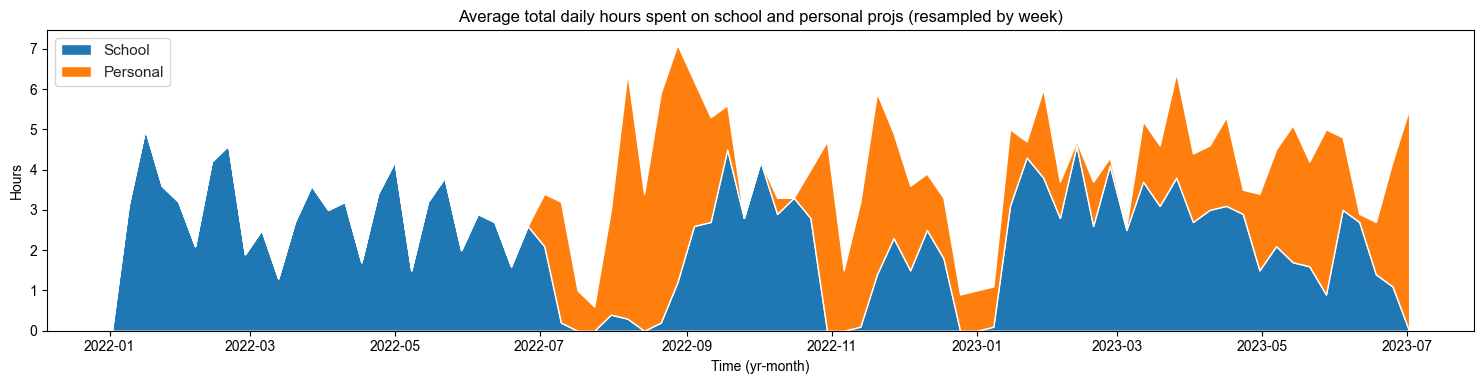

In [29]:
# plot daily hours spent 
fig, ax = plt.subplots(figsize=(15, 4))

ax = sns.set_theme(context='notebook', style='whitegrid',
                   palette=['#f08080', '#9381ff'], font='sans-serif',
                   font_scale=1)

# Basic stacked area chart.
plt.stackplot(stacked_chart_df.index, stacked_chart_df['sch_hrs'], stacked_chart_df['pers_hrs'], labels=['School','Personal'])
plt.legend(loc='upper left')
plt.title('Average total daily hours spent on school and personal projs (resampled by week)')
plt.xlabel('Time (yr-month)')
plt.ylabel('Hours')

fig.tight_layout()
fig.show()

Overlay 2 line plots

In [30]:
overlay_lines_df = daily_hrs.copy()

# get from this date () comment these lines out if don't wish to resample
date_input = datetime(2022, 1, 1)
overlay_lines_df = daily_hrs[daily_hrs.index >= date_input]

# RESAMPLING (if desired) ~~~~~~~~
# get daily mean (resampled weekly)
overlay_lines_df = overlay_lines_df[['sch_hrs', 'pers_hrs']].resample('W').mean().round(1)

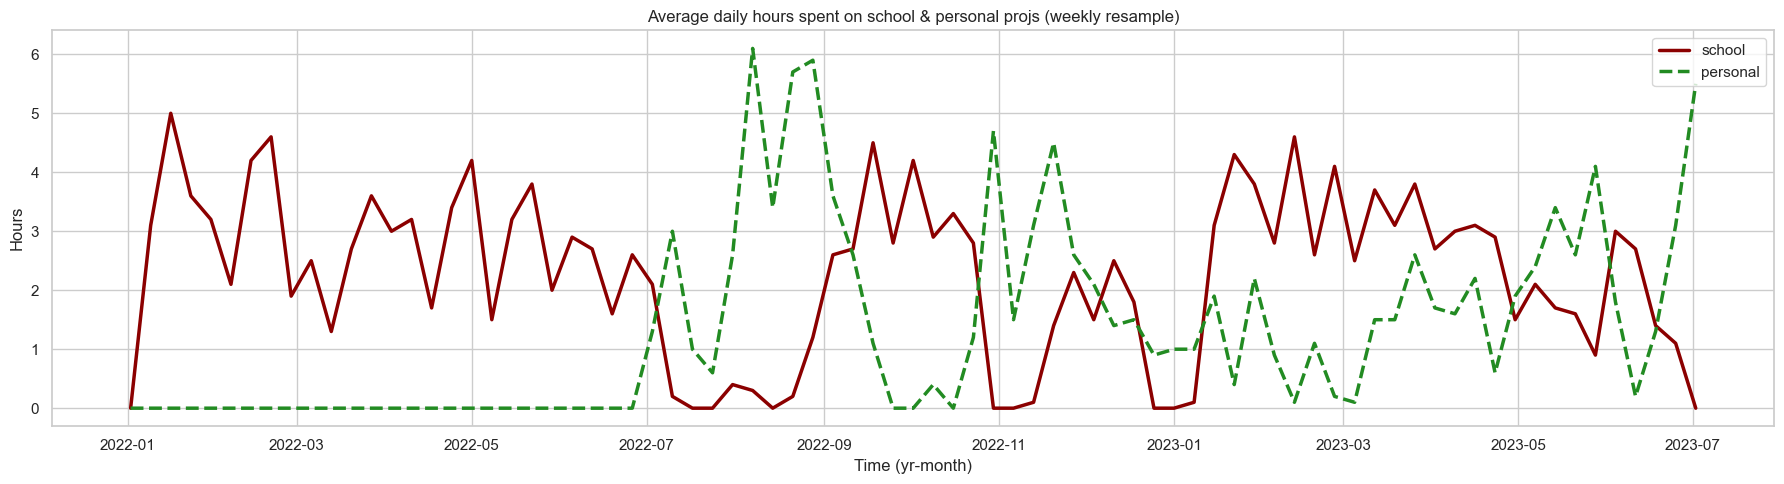

In [31]:
# Overlay number of entries a year to cumulative word count and mean word count
fig, ax = plt.subplots(figsize=(18, 5))

# plot school
ax.plot(overlay_lines_df.index, overlay_lines_df['sch_hrs'],
        color='darkred', linewidth=2.5, linestyle='-', label='school')

# plot personal
ax.plot(overlay_lines_df.index, overlay_lines_df['pers_hrs'],
        color='forestgreen', linewidth=2.5, linestyle='--', label='personal')

ax.set(title='Average daily hours spent on school & personal projs (weekly resample)', xlabel='Time (yr-month)', ylabel='Hours')

ax.legend(loc='upper right')
fig.tight_layout()
fig.show()

In [32]:
total_hrs = df_combi['hours'].sum().round()
total_sess = len(df_combi)
avg_sess_duration = round((total_hrs/total_sess), 1)
avg_sess_duration_mins = round(avg_sess_duration * 60)

print(f'Total number of hours:    {total_hrs} hours')
print(f'Total number of sessions: {total_sess} sessions')
print(f'Avg session duration:     {avg_sess_duration} hrs/session ~{avg_sess_duration_mins} mins/session')

Total number of hours:    1987.0 hours
Total number of sessions: 1176 sessions
Avg session duration:     1.7 hrs/session ~102 mins/session


#### <span style='color:LightGreen'>**Understand overview of daily productivity:**</span>
<ul style='color:LightGreen'>
  <li>What is the total number of productive hours logged?
  <li>What is the total number of activity sessions logged?
  <li>What is the average session duration?
</ul>

In [33]:
total_hrs = df_combi['hours'].sum().round()
total_sess = len(df_combi)
avg_sess_duration = round((total_hrs/total_sess), 1)
avg_sess_duration_mins = round(avg_sess_duration * 60)

print(f'Total number of hours:    {total_hrs} hours')
print(f'Total number of sessions: {total_sess} sessions')
print(f'Avg session duration:     {avg_sess_duration} hrs/session ~{avg_sess_duration_mins} mins/session')

Total number of hours:    1987.0 hours
Total number of sessions: 1176 sessions
Avg session duration:     1.7 hrs/session ~102 mins/session


Extra stuff (count from summer)

In [34]:
ovr_view_df = daily_hrs[daily_hrs.index >= datetime(2022, 6, 30)].drop(columns=['sch_hrs', 'pers_hrs'])

In [35]:
total_num_days = len(ovr_view_df)
total_hrs = ovr_view_df['total_hrs'].sum().round(1)
days_not_0 = len(ovr_view_df[ovr_view_df['total_hrs'] != 0])

# average hours a day since summer (since that is when first started recording school + personal activities)
print(f'The following will be from 30th June 2022 (since collecting personal data) till 26th June 2023 (up till when data was collected)\n')
print(f'Total days since summer 2022:                         {total_num_days} days')
print(f'Total productive hrs since summer 2022:               {total_hrs} hrs')
print(f'Days with at least 1 session:                         {days_not_0} out of {total_num_days} days\n')
print(f'Average productive hrs a day (total days):            {round((total_hrs/total_num_days), 1)} hrs/day')
print(f'Average productive hrs a day (only productive days):  {round((total_hrs/days_not_0), 1)} hrs/day')


The following will be from 30th June 2022 (since collecting personal data) till 26th June 2023 (up till when data was collected)

Total days since summer 2022:                         362 days
Total productive hrs since summer 2022:               1445.4 hrs
Days with at least 1 session:                         325 out of 362 days

Average productive hrs a day (total days):            4.0 hrs/day
Average productive hrs a day (only productive days):  4.4 hrs/day


#### <span style='color:LightGreen'>**Visualise daily time spent | daily average | weekly sum**</span>

In [36]:
totals_df = daily_hrs[daily_hrs.index >= datetime(2022, 1, 1)].drop(columns=['sch_hrs', 'pers_hrs'])

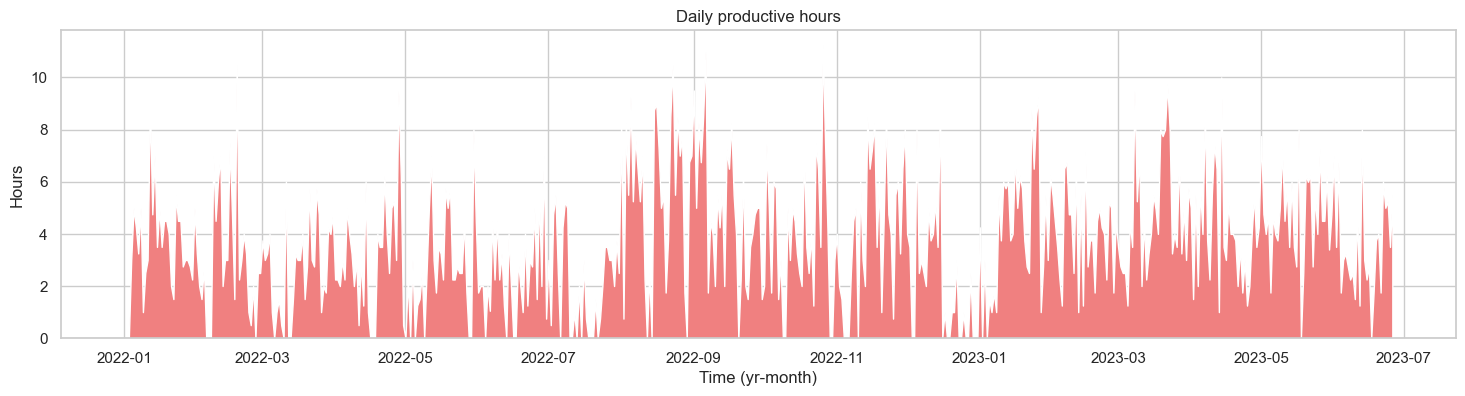

In [37]:
# plot daily
fig, ax = plt.subplots(figsize=(18, 4))
#ax = sns.lineplot(data=totals_df)
ax = plt.stackplot(totals_df.index, totals_df['total_hrs'])

plt.title('Daily productive hours'); plt.xlabel('Time (yr-month)'); plt.ylabel('Hours')
plt.yticks(ticks=[i for i in range(0, 11, 2)])
plt.grid(visible=True, which='both', axis='y')

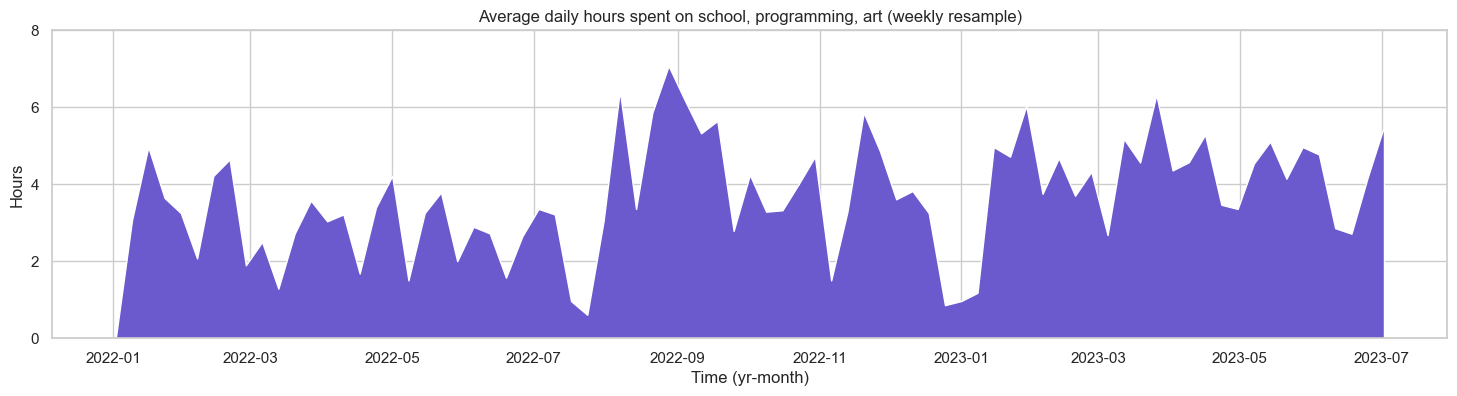

In [38]:
# resample to weekly frequency, aggregating with MEAN (thus, plotting daily mean)
totals_daily_mean = totals_df[['total_hrs']].resample('W').mean()

ax = sns.set_theme(context='notebook', style='whitegrid',
                   palette=['slateblue', '#9381ff'], font='sans-serif',
                   font_scale=1)

# plot weekly sum
fig, axes = plt.subplots(figsize=(18, 4))
# ax = sns.lineplot(data=totals_daily_mean)
ax = plt.stackplot(totals_daily_mean.index, totals_daily_mean['total_hrs'])
plt.title('Average daily hours spent on school, programming, art (weekly resample)'); plt.xlabel('Time (yr-month)'); plt.ylabel('Hours')
plt.yticks(ticks=[i for i in range(0, 9, 2)])
plt.grid(visible=True, which='both', axis='y')

In [39]:
avg_hrs = round(totals_df['total_hrs'].mean())
print(f'Average daily hours spent on school/programming/art: {avg_hrs} hours')

Average daily hours spent on school/programming/art: 4 hours


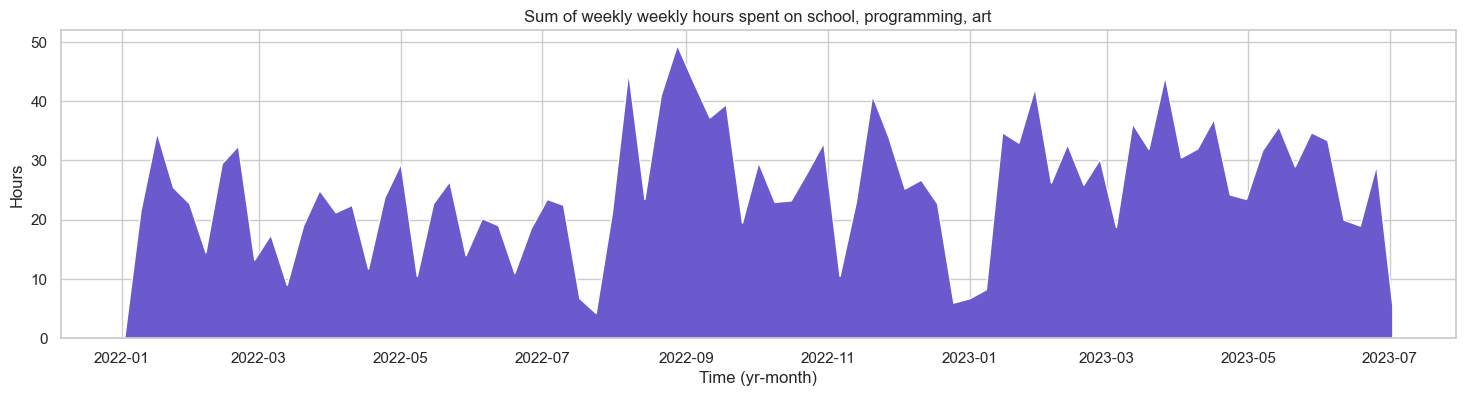

In [40]:
# resample the data to weekly frequency, aggregating with SUM
totals_weekly_sum =  totals_df[['total_hrs']].resample('W').sum()

# plot weekly sum
fig, axes = plt.subplots(figsize=(18, 4))
# ax = sns.lineplot(data=totals_daily_mean)
ax = plt.stackplot(totals_weekly_sum.index, totals_weekly_sum['total_hrs'])
plt.title('Sum of weekly weekly hours spent on school, programming, art'); plt.xlabel('Time (yr-month)'); plt.ylabel('Hours')
plt.grid(visible=True, which='both', axis='y')

#### <span style='color:LightGreen'>**Set up bar race dataframe and excel**</span>

In [41]:
# select from start of 2022 (actually, from the 4th cause that's the first recorded day)
bar_race_df = daily_hrs[daily_hrs.index >= datetime(2022, 1, 4)].drop(columns=['total_hrs'])

# get cumulative sum of hours
bar_race_df = bar_race_df.cumsum()
bar_race_df.reset_index(inplace=True)

In [42]:
# save to excel
# bar_race_df.to_excel('activities_bar_race.xlsx', index=False)